## Homework 1
## Julia implementation of Problem 7-10

In [1]:
function gen_target()
    linpts = 2.0*rand((2,2)) - 1.0
    targ_weights = [1.0; linpts \ [-1, -1]] # a bit slow
    return targ_weights
end

function gen_dataset(num_points, targ_weights)
    points = [ones(num_points) (2.0*rand((num_points,2)) - 1.0)]
    labels = sign(points*targ_weights)
    return points, labels
end

function mis_collection(points, labels, weights)
    return find(sign(points*weights) .!= labels)
end

function perceptron(points, labels)
    weights = zeros(3)
    num_iter = 0
    mis_idxs = mis_collection(points, labels, weights)
    while true
        idx = mis_idxs[rand(1:length(mis_idxs))]
        weights += labels[idx] * points[idx,:][:]
        num_iter += 1
        mis_idxs = mis_collection(points, labels, weights)
        if length(mis_idxs) == 0
            break
        end
    end
    
    return weights, num_iter
end

function prob_difference(targ_weights, hypo_weights; num_mcpoints=10000)
    points = [ones(num_mcpoints) (2.0*rand((num_mcpoints,2)) - 1.0)]
    return sum(sign(points*targ_weights) .!= sign(points*hypo_weights)) / num_mcpoints
end

prob_difference (generic function with 1 method)

In [2]:
using PyCall,PyPlot
@pyimport seaborn as sns

function plot_pla(points, labels, targ_weights, hypo_weights)

    x11,x12,x21,x22=[], [], [], []
    for idx in 1:size(points)[1]
        if labels[idx] == 1
            push!(x11, points[idx,2])
            push!(x12, points[idx,3])
        else
            push!(x21, points[idx,2])
            push!(x22, points[idx,3])
        end
    end

    fig = figure("perceptron",figsize=(5,5))
    ax = axes()
    xlim(-1, 1)
    ylim(-1, 1)
    scatter(x11, x12, alpha=0.5, color="red")
    scatter(x21, x22, alpha=0.5, color="blue")
    s = linspace(-1,1)
    targ_func(x) = -targ_weights[2]/targ_weights[3]*x - targ_weights[1]/targ_weights[3]
    hypo_func(x) = -hypo_weights[2]/hypo_weights[3]*x - hypo_weights[1]/hypo_weights[3]
    plot(s, targ_func(s), "g-")
    plot(s, hypo_func(s), "y-")
    title("Perceptron")
    xlabel(L"$x_1$")
    ylabel(L"$x_2$")
    grid("on")
end

plot_pla (generic function with 1 method)

In [3]:
function simulate_pla(num_points; num_iterations=1000, num_mcpoints=10000, plot=false)
    iter_sum = 0
    prob_sum = 0.0
    for idx in 1:num_iterations
        targ_weights = gen_target()
        points, labels = gen_dataset(num_points, targ_weights)
        weights, num_iter = perceptron(points, labels)
        prob_sum += prob_difference(targ_weights, weights, num_mcpoints=num_mcpoints)
        iter_sum += num_iter
        if plot == true && idx == num_iterations
            plot_pla(points, labels, targ_weights, weights)
        end
    end
    return iter_sum/num_iterations, prob_sum / num_iterations
end

simulate_pla (generic function with 1 method)

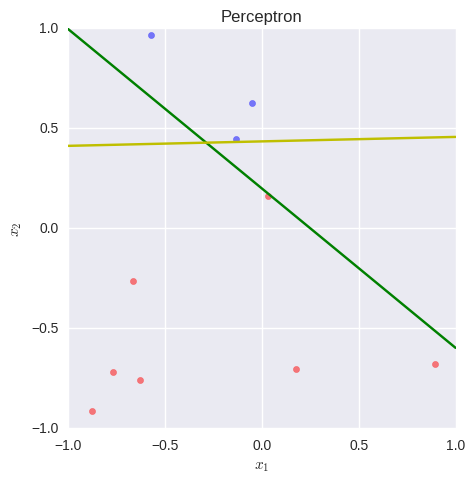

  1.070606 seconds (355.21 k allocations: 1.110 GB, 9.77% gc time)


(10.201,0.11219989999999998)

In [5]:
@time simulate_pla(10, num_iterations=1000, num_mcpoints=10000, plot=true)

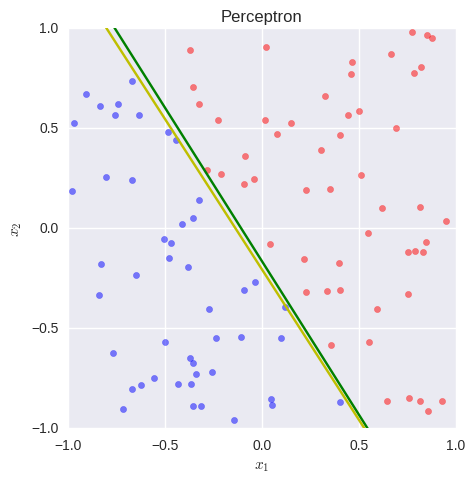

  2.280824 seconds (2.68 M allocations: 1.825 GB, 10.86% gc time)


(115.876,0.013164600000000023)

In [6]:
@time simulate_pla(100, num_iterations=1000, num_mcpoints=10000, plot=true)

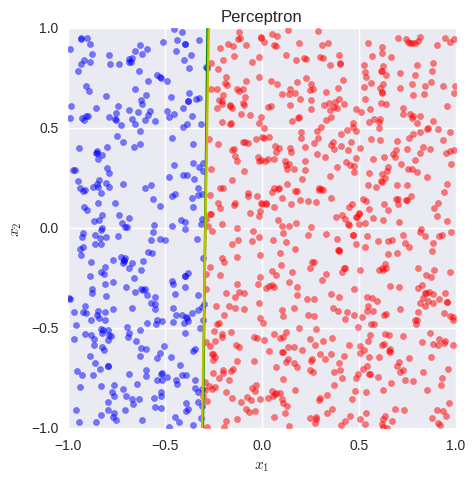

 28.295732 seconds (25.84 M allocations: 21.170 GB, 10.08% gc time)


(990.237,0.001296899999999995)

In [8]:
@time simulate_pla(1000, plot=true)

In [9]:
@time simulate_pla(100, num_iterations=10000)

 19.539408 seconds (24.57 M allocations: 17.595 GB, 11.71% gc time)


(105.8376,0.013529230000000034)

### The distribution of the number of iterations

In [10]:
using PyPlot

function num_iter_histgram(num_points; num_iterations=1000)
    iter_list = []
    prob_sum = 0.0
    for idx in 1:num_iterations
        targ_weights = gen_target()
        points, labels = gen_dataset(num_points, targ_weights)
        weights, num_iter = perceptron(points, labels)
        push!(iter_list, num_iter)
    end
    fig = figure("histogram",figsize=(5,5))
    h = plt[:hist](iter_list,round(Int64, num_iterations/10))
    grid("on")
    title("Histogram of iter_num")
    return iter_list
end

num_iter_histgram (generic function with 1 method)

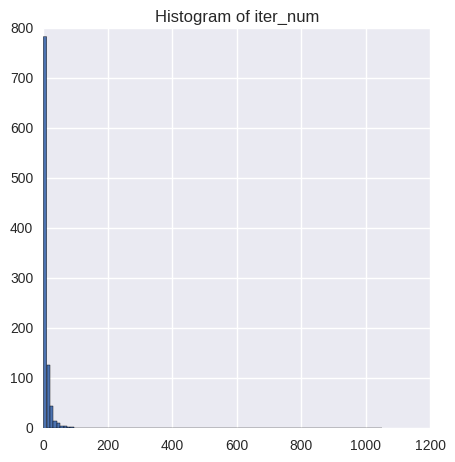

mean:11.16


10-element Array{Any,1}:
 1051
  365
  214
  175
  140
  113
   94
   85
   81
   77

In [11]:
iter_list = num_iter_histgram(10, num_iterations=1000)
println("mean:", mean(iter_list))
sort(iter_list, rev=true)[1:10]

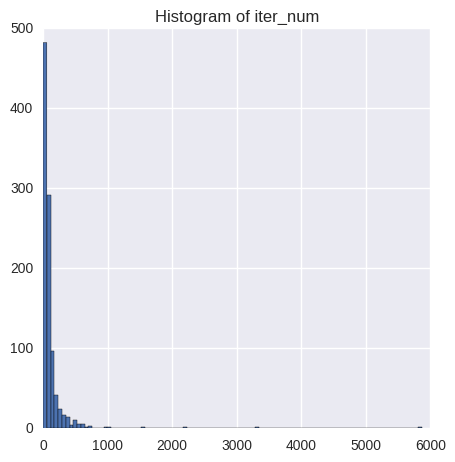

mean:110.133


10-element Array{Any,1}:
 5863
 3305
 2187
 1563
 1045
  982
  961
  734
  729
  729

In [12]:
iter_list = num_iter_histgram(100, num_iterations=1000)
println("mean:", mean(iter_list))
sort(iter_list, rev=true)[1:10]

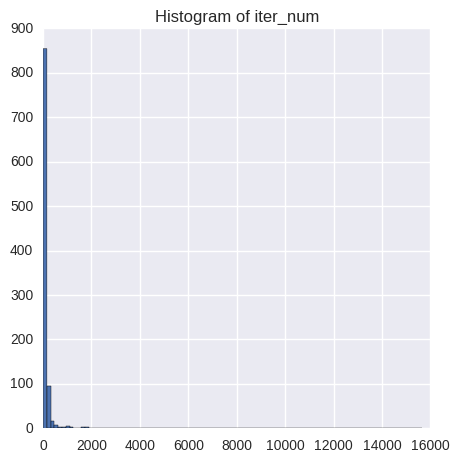

mean:130.355


10-element Array{Any,1}:
 15655
  4473
  2383
  1869
  1815
  1713
  1691
  1667
  1599
  1223

In [13]:
iter_list = num_iter_histgram(100, num_iterations=1000)
println("mean:", mean(iter_list))
sort(iter_list, rev=true)[1:10]